# Final Project
## Luke Barry
### Daily Portfolio Summary Dashboard:
#### *Streamlining Crypto Asset Research with Web Scraping and Sentiment Analysis*


In [1]:
# Import libraries
import requests
import json
import pandas as pd
import requests
import time
import matplotlib.pyplot as plt
from textblob import TextBlob
%matplotlib inline
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
import webbrowser
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import datetime
import mplfinance as mpf
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
import datetime
import mplfinance as mpf

In [2]:
def listToString(s):
    """Converts a list to a string"""
    str1 = "" 
    for ele in s: 
        str1 += ele  
    return str1

def sample_events(ticker):
    """Prints summaries for a sample of news events"""
    for i in df_events['event_name'][df_events['tickers'] == ticker].head(3).values:
        print (i)

def sentiment_pie(df):
    """Creates pie plot for news sentiment based on ticker"""
    fig, ax = plt.subplots(figsize=(5, 5))
    labels = ['Positive' , 'Neutral','Negative']
    df.iloc[:3].plot.pie(y=df.columns[0], autopct='%1.1f%%', shadow=True, startangle=45, colors=pie_colors, labels=None, title=None, ax=ax)
    plt.legend(labels, loc="upper right")
    ax.set_ylabel(None)
    plt.axis('equal')
    plt.title('News sentiment analysis for: ' + df.columns[0])
    plt.show()
    
# source: Yalin Yener
def tweet_pie_chart(keyword):
    """Analyzes sentiment for specified number of tweets and returns a pie chart"""
    tweet_count = 200 #limiting to 200 because I have small limit but more oculd be acheived with a premium api account
    tweets = tweepy.Cursor(api.search, q='$' + keyword).items(tweet_count)
    positive = 0
    negative = 0
    neutral = 0
    polarity = 0
    tweet_list = []
    neutral_list = []
    negative_list = []
    positive_list = []
    for tweet in tweets:

        tweets = tweepy.Cursor(api.search, q=keyword).items(tweet_count)
        tweet_list.append(tweet.text)
        analysis = TextBlob(tweet.text)
        score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
        neg = score['neg']
        neu = score['neu']
        pos = score['pos']
        comp = score['compound']
        polarity += analysis.sentiment.polarity

        if neg > pos:
            negative_list.append(tweet.text)
            negative += 1
        elif pos > neg:
            positive_list.append(tweet.text)
            positive += 1

        elif pos == neg:
            neutral_list.append(tweet.text)
            neutral += 1
    positive = percentage(positive, tweet_count)
    negative = percentage(negative, tweet_count)
    neutral = percentage(neutral, tweet_count)
    polarity = percentage(polarity, tweet_count)
    positive = format(positive, '.1f')
    negative = format(negative, '.1f')
    neutral = format(neutral, '.1f')
    
    #Creating PieCart
    labels = ['Positive' , 'Neutral', 'Negative']
    sizes = [positive, neutral, negative]
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_ylabel(None)
    plt.pie(sizes, autopct='%1.1f%%', shadow=True, startangle=45, colors=pie_colors)
    plt.legend(labels, loc='upper right')
    plt.title("Twitter sentiment analysis for " + keyword)
    plt.axis('equal')
    plt.show()


#Sentiment Analysis
def percentage(part,whole):
    """Returns percentage"""
    return 100 * float(part)/float(whole)


#function for price and volume plot
def price_vol_plot(ticker):
    """Creates a plot displaying price hourly action for specified ticker in the last 24 hours"""
    #get historical data (ticker, time interval, time range (now - 1 day)
    historical = client.get_historical_klines('{}USDT'.format(ticker), Client.KLINE_INTERVAL_1HOUR, "1 day ago UTC")
    
    #put historical data into df
    hist_df = pd.DataFrame(historical)
    
    #specify column names
    hist_df.columns = columns
    
    #convert open/close time to datetime (/1000 because of extra zeros in data, unit =seconds)
    hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
    hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')
    
    #convert numeric columns to numeric data
    hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)

    #plot data
    mpf.plot(hist_df.set_index('Close Time').tail(24), 
            **kwargs, style=s,
            title=ticker.replace('USDT', '') + ' Last 24 hours')
#create list of columns for historical data df
columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

#create list of numeric column names for historical 
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

#kwargs for mpf plot
kwargs = dict(type='candle', volume=True, figratio=(11,8), figscale=0.85)

#take marketcolors from 'nightclouds', but make them easier to see on a light background:
mc = mpf.make_marketcolors(base_mpf_style='yahoo',
                           edge='#505050',wick='#505050')

#create a style based on `seaborn` using those market colors:
s  = mpf.make_mpf_style(base_mpl_style='seaborn',marketcolors=mc)
    
# Set Colours for pie chart (positive, neutral, negative)
pie_colors = ['g', 'y', 'r']


In [ ]:
# Binance API
b_apikey = 'W5q81Vwva3j7dIqdSVkYGiQjH7nIcmukDGzTM4uSpwCWVmJNYKKuAceXWWCC7uYq'
b_secret = 'k5ilCtVaEk9zge1k9opuehooGHd07dNwS8wsmci1AenWrXMPUd62M0irTHO8paPS'

# Twitter API
key = "1Fg4PBJuOXJVenQk9Pdnuyb3W"
secret = "59WD8zKElMdLSO12xRVkmI0ADdacek9sNPPXZmfs2HvuxgS8mo"

token = '901239757-VoFq2C7euGCoJCIOoUQ2BNid9DsRC6mdWTZMespg'
tokensecret = 'RYhxQvTHm0PlYlqEzZThdKBd3b42Vp0GI8NWlCuqeECQM'

In [4]:
##APIs

# Binance API
b_apikey = 'W5q81Vwva3j7dIqdSVkYGiQjH7nIcmukDGzTM4uSpwCWVmJNYKKuAceXWWCC7uYq'
b_secret = 'k5ilCtVaEk9zge1k9opuehooGHd07dNwS8wsmci1AenWrXMPUd62M0irTHO8paPS'
client = Client(b_apikey, b_secret)

# Twitter API
key = "1Fg4PBJuOXJVenQk9Pdnuyb3W"
secret = "59WD8zKElMdLSO12xRVkmI0ADdacek9sNPPXZmfs2HvuxgS8mo"
consumer_key = key
consumer_secret = secret
token = '901239757-VoFq2C7euGCoJCIOoUQ2BNid9DsRC6mdWTZMespg'
tokensecret = 'RYhxQvTHm0PlYlqEzZThdKBd3b42Vp0GI8NWlCuqeECQM'
callback_uri = 'oob'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_uri)
auth.set_access_token(token, tokensecret)
redirect_url = auth.get_authorization_url()
print(redirect_url)
webbrowser.open(redirect_url)
user_pin_input = input("What's the pin value? ")
api = tweepy.API(auth)

https://api.twitter.com/oauth/authorize?oauth_token=gt04eQAAAAABLqoCAAABgVgSNTs


What's the pin value?  1803067


***

## App Demo
> Below I bring it all together and simulate the outputs that could expected to be seen on the app, immitating the users experience of simply inputing the tickers of their chosen assets.

> The app would of course require further developement, but that is out of the scope of this project.

Enter the number of assets:  3
Enter assets separated by space:  ETH XRP BTC


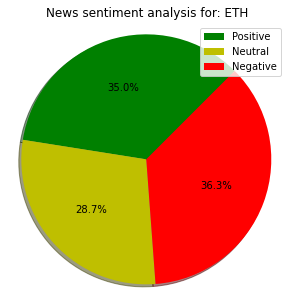

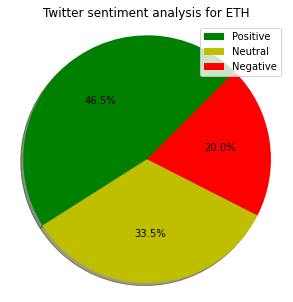

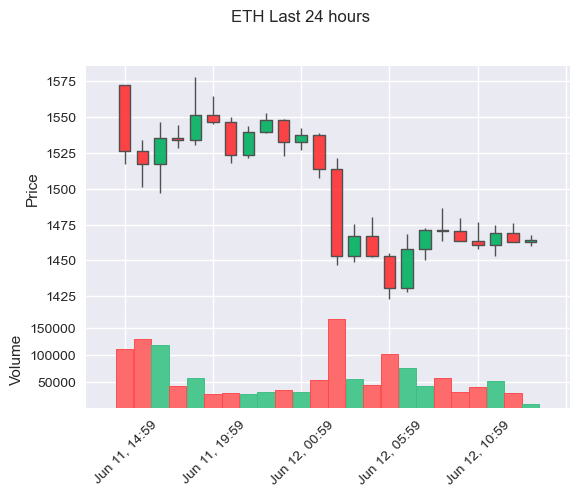

ETH News:
Ethereum Core Developers announce further delay of ‘Difficulty Bomb'
Ethereum price falls almost 12% in last 24 hours
Ethereum drops to lowest level since March 2021


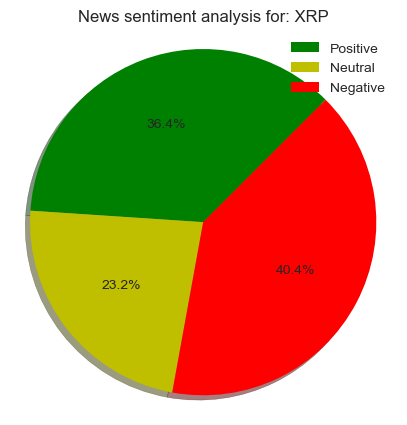

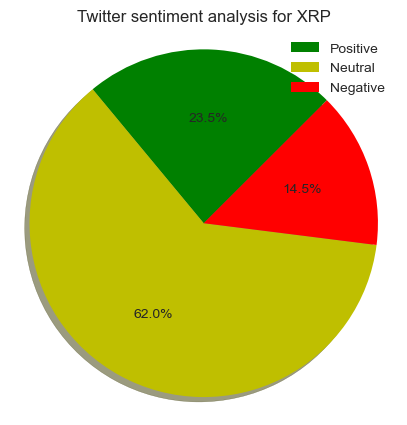

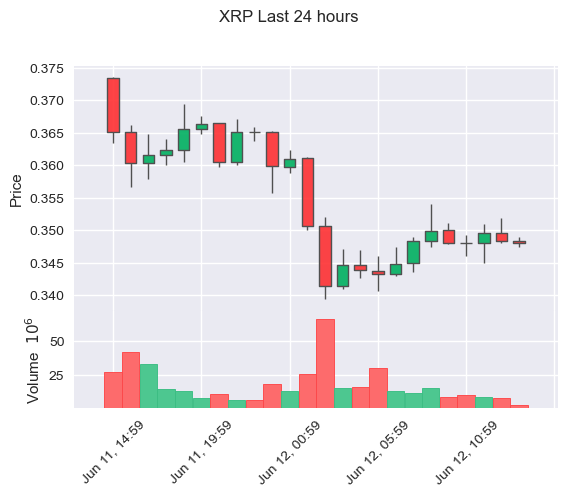

XRP News:
Ripple partners with Lunu to boost Crypto adoption
SEC v. Ripple: Hinman Docs Become Focus of New Conference
Ripple to explore IPO after SEC lawsuit, CEO discloses


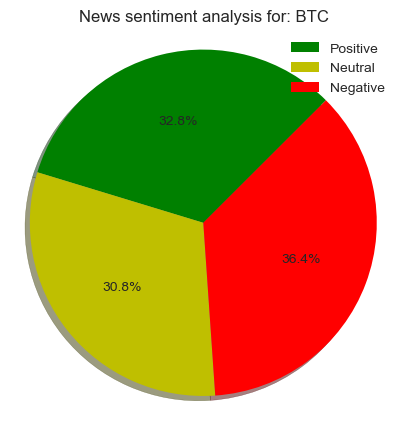

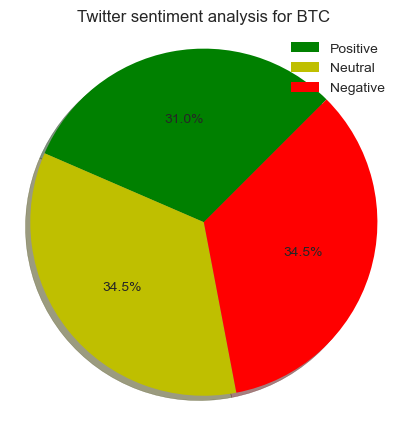

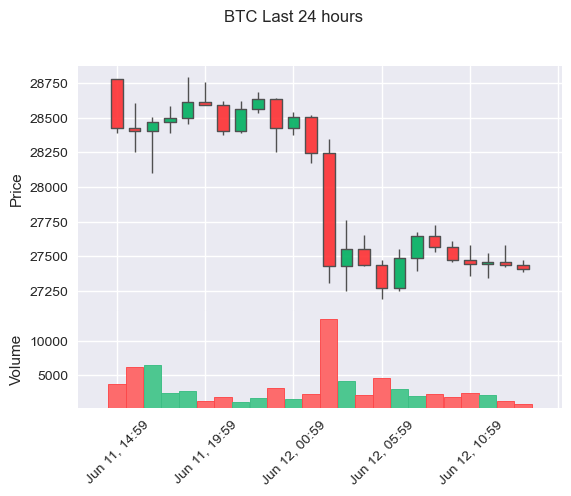

BTC News:
Bitcoin fails to recover as elevated inflation weighs on sentiment
Bitcoin slips after steaming-Hot U.S. Inflation
Jay-Z and Jack Dorsey Launch 'Bitcoin Academy' at Rapper's Childhood Home in Brooklyn


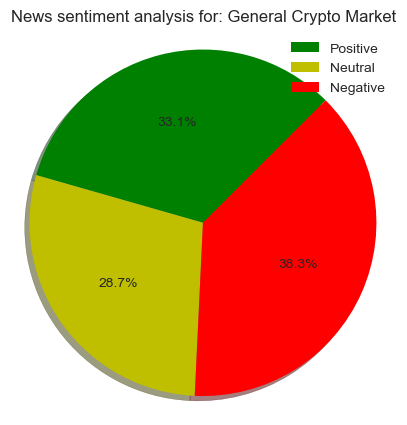

In [5]:
#Empty list for     
event_dfs = []
sentiment_dfs = []

count = int(input("Enter the number of assets: "))
tickers = list(x for x in input("Enter assets separated by space: ").strip().split())[:count]

df_news_sentiment = pd.read_json('https://cryptonews-api.com/api/v1/stat?&section=general&date=last30days&token=o0nxeaivbtzf74mhcwlcw9pxjr8zwzq4yxnkknlk')

for i in tickers:
    event_dfs.append(pd.read_json('https://cryptonews-api.com/api/v1/events?&tickers={}&token=o0nxeaivbtzf74mhcwlcw9pxjr8zwzq4yxnkknlk'.format(i))['data'].apply(pd.Series))
df_events = pd.concat(event_dfs)
df_events['tickers'] = [listToString(i) for i in df_events['tickers']]
for i in tickers:
    df_events.loc[df_events['tickers'].str.contains(i), 'tickers'] = i


for i in tickers:
    sentiment_dfs.append(pd.read_json('https://cryptonews-api.com/api/v1/stat?&tickers={}&date=last30days&token=o0nxeaivbtzf74mhcwlcw9pxjr8zwzq4yxnkknlk'.format(i))
                         ['total'].apply(pd.Series).head(1).T)
df_sentiment = pd.concat(sentiment_dfs)

for i in sentiment_dfs:
    sentiment_pie(i)
    tweet_pie_chart(i.columns[0])
    price_vol_plot(i.columns[0])
    print(i.columns[0], 'News:')
    sample_events(i.columns[0])
    time.sleep(5)

sentiment_pie(df_news_sentiment.iloc[:3, :1].rename(columns = {'total': 'General Crypto Market'}))
plt.show()

## Next steps

> The twitter sentiment analysis may be expanded or replaced for social media analysis that includes sentiment from other social media such as LinkedIn, Facebook, Reddit, etc.

> The front end for the app still needs to be created if and when the goi ahead is given to move foreward with this project.

> There are certain limitations with free access to APIs, mostly involving limited pull requests, that can be overcome by purchasing premium accounts from the API providers. This would allow the project to scale. 

***
## Additional Analysis - How to use the tool
> Below I will exemplify subjectively the best use of the sentiment analysis tool

*“Sentiment analysis can be most effective as a contrarian indicator when price movements have become overly bullish or bearish. After all, retail traders tend to be reactive trend followers who base their buying and selling decisions on the market’s general direction or a particular company’s activities. Therefore, one could make successful sentiment-based trades by going against the grain of strong sentiment bias. By following this strategy, investors can unearth attractive oversold positions.*

*If investors’ sentiment toward the markets overall or individual stocks are pessimistic based on specific news developments, their uneven emotions can drive increased panic selling. As bearish sentiment strengthens, ensuing selloffs can reveal buying opportunities since compounding selling would create inherent value.”*

– Kukla, G. (2022, paras. 3&4)
Taken From: https://www.jkinvestmentgroup.com/blog/the-role-of-sentiment-analysis-in-investment-decision-making-1

>Essentially, the market tends to overreact, based on the emotions of traders, to highly positive or negative news, causing extreme swings in price. Highly speculative assets like cryptocurrency are especially vulnerable to these kinds of price swings. This creates opportunities for investors to look at the market holistically and try to determine if movements in price are over or under reactions to certain news events. Let’s take a closer look at the broader market’s reaction to Elon Musk’s Tweet about Tesla not accepting Bitcoin (Example 1) by looking at the bitcoin price in the following months after Elon’s Tweet (Example 2), sentiment analysis comparing the day and week of the tweet (Examples 3 and 4), and other news examples in the same week as the tweet (Example 5). The goal is to examine the price change and determine if the extreme downturn in price is justified given other news headlines and broader market sentiment.

In [6]:
# Establish default ticker
ticker = 'BTC'

In [7]:
# import example image
from IPython.display import Image
print('Example 1')
Image(url='Elon_Tweet.png')

Example 1


Example 2


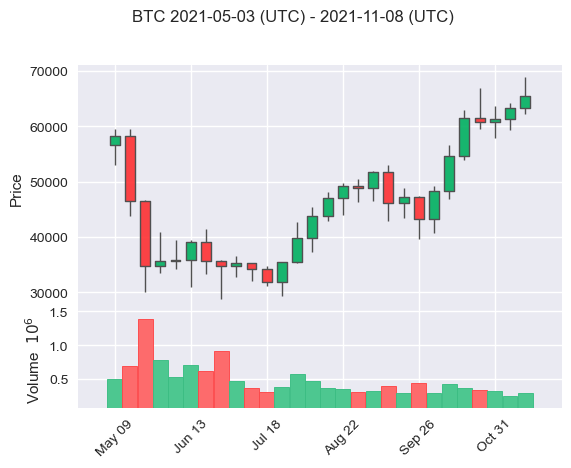

In [8]:
#establish chart start and end dates
chart_start = "2021-05-03 (UTC)"
chart_end = "2021-11-08 (UTC)"

#get historical data (ticker, time interval, time range (now - 1 day)
historical = client.get_historical_klines('{}USDT'.format(ticker), Client.KLINE_INTERVAL_1WEEK, start_str=chart_start, end_str=chart_end)
historical[0:5]

#create list of columns for historical data df
columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

#put historical data into df
hist_df = pd.DataFrame(historical)

#specify column names
hist_df.columns = columns

#create list of numeric column names for historical 
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

#convert open/close time to datetime (/1000 because of extra zeros in data, unit =seconds)
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')

#convert numeric columns to numeric data
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)

# plot data
# hourly last 24 hours
print('Example 2')
mpf.plot(hist_df.set_index('Close Time'), 
        **kwargs, style=s,
        title=ticker.replace('USDT', '') + ' ' + chart_start + ' - ' + chart_end) # Binance provides price against USDT, which is tied to the value of a US dollar.

Example 3 

For date: May 13, 2021


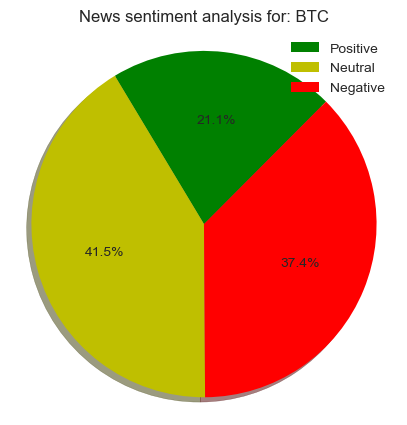

In [9]:
#start and end dates
sent_start = '05132021'
sent_end = '05132021'

# summarize and transform data using total row
ticker_df = pd.read_json('https://cryptonews-api.com/api/v1/stat?&tickers={}&date={}-{}&token=o0nxeaivbtzf74mhcwlcw9pxjr8zwzq4yxnkknlk'.format(ticker, sent_start, sent_end))\
                        ['total'].apply(pd.Series).head(1).T
# Pie chart for sentiment analysis
print('Example 3 \n')
print('For date: May 13, 2021')
sentiment_pie(ticker_df)

Example 4 

For dates: May, 10, 2021 - May, 17, 2021


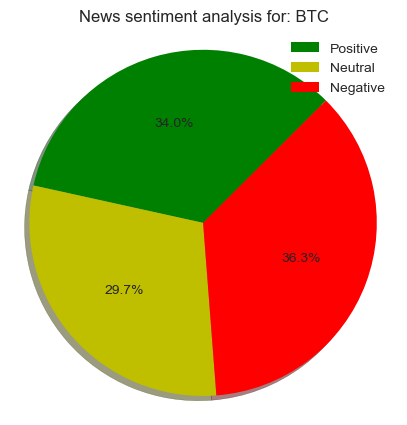

In [10]:
#start and end dates
sent_start = '05102021'
sent_end = '05172021'

ticker_df = pd.read_json('https://cryptonews-api.com/api/v1/stat?&tickers={}&date={}-{}&token=o0nxeaivbtzf74mhcwlcw9pxjr8zwzq4yxnkknlk'.format(ticker, sent_start, sent_end))\
                        ['total'].apply(pd.Series).head(1).T
# Pie chart for sentiment analysis
print('Example 4 \n')
print('For dates: May, 10, 2021 - May, 17, 2021')
sentiment_pie(ticker_df)

In [11]:
# transform into df for readability
news_start = '05102021'
news_end = '05172021'

df_events = pd.read_json('https://cryptonews-api.com/api/v1/events?&tickers={}&date={}-{}&token=o0nxeaivbtzf74mhcwlcw9pxjr8zwzq4yxnkknlk'.format(ticker, news_start, news_end))['data'].apply(pd.Series)

# transform tickers column to list since they are currently in brackets
df_events['tickers'] = [listToString(i) for i in df_events['tickers']]

# inspect first 5 events
print('Example 5 \n')
print('News Events between dates: May, 10, 2021 - May, 17, 2021: \n')
for i in df_events['event_name'][df_events['tickers'] == ticker].values:
        print (i)

Example 5 

News Events between dates: May, 10, 2021 - May, 17, 2021: 

Bitcoin bull Tom Lee increases Bitcoin price expectation to $125,000 amid sell-off
Elon Musk Discloses ‘Tesla Has Not Sold Any Bitcoin'
Bitcoin dumps after Elon Musk fails to deny that Tesla could sell all its Bitcoin holdings
Greenidge to go carbon neutral as BTC adopters pull back citing environment harm
Square Says It Has No Plans to Change Bitcoin Buying Strategy
Bitcoin Miner Argo Blockchain Purchases Hydro-Powered Data Centers in Canada
Bitcoin Mining Difficulty Hits All-Time High
MicroStrategy Keeps Buying Bitcoin, Adds Another $15M
Elon Musk says Tesla will no longer accept Bitcoin over energy concerns
MoneyGram to Enable Users to Buy Bitcoin
Cboe files proposal to list Fidelity Bitcoin ETF with SEC
Palantir starts accepting Bitcoin, may add to balance sheet
Mark Zuckerberg's post about his goat bitcoin creates speculation among crypto enthusiasts
BTC could trade for $250K within five years: Morgan Creek Ca

>As we can see, the extreme price correction, showed in the first months in the graph of Example 2, is a result of one outlier – Elon’s Tweet, in a generally positive marketplace. Looking at Examples 3 and 4, the daily sentiment is generally not positive, but the sentiment over the entire week is balanced. Furthermore, Example 5 shows many positive news events along side the negative headline “Elon Musk says Tesla will no longer accept Bitcoin over energy concerns” throughout the same time frame, even though the price continues to fall significantly. The over reaction of the market caused an opportunity for aware investors to buy Bitcoin at nearly half the price as the prior month and see the price regain its strength, even hitting new all-time highs over the next few months. Investors properly using the analysis would be wary of these new highs, however, and be checking to ensure the positive price action is in line with the sentiment of the market (it wasn’t).

***
# Breakdown
> Break down of each aspect of the app demo above

## News Sentiment Analysis and summaries using Crypto News API

> After failed attempts at using yahoo and google news, I landed on https://cryptonews-api.com/ which offers the ability to pull the latest crypto news stories as well as their summaries and sentiment.

> It's use will require some transformation from Json

#### Single Ticker

In [12]:
# specify ticker
ticker = 'ETH'

In [13]:
# pull data for specified ticker and inspect news sentiment for last 30 days using read json
pd.read_json('https://cryptonews-api.com/api/v1/stat?&tickers={}&date=last30days&token=o0nxeaivbtzf74mhcwlcw9pxjr8zwzq4yxnkknlk'.format(ticker))

,total,data,total_pages
ETH,"{'Total Positive': 371, 'Total Negative': 304,...",NaN,1
2022-06-12,NaN,"{'ETH': {'Neutral': 3, 'Positive': 1, 'Negativ...",1
2022-06-11,NaN,"{'ETH': {'Neutral': 8, 'Positive': 6, 'Negativ...",1
2022-06-10,NaN,"{'ETH': {'Neutral': 7, 'Positive': 13, 'Negati...",1
2022-06-09,NaN,"{'ETH': {'Neutral': 21, 'Positive': 29, 'Negat...",1
2022-06-08,NaN,"{'ETH': {'Neutral': 25, 'Positive': 29, 'Negat...",1
2022-06-07,NaN,"{'ETH': {'Neutral': 10, 'Positive': 11, 'Negat...",1
2022-06-06,NaN,"{'ETH': {'Neutral': 18, 'Positive': 18, 'Negat...",1
2022-06-05,NaN,"{'ETH': {'Neutral': 6, 'Positive': 4, 'Negativ...",1
2022-06-04,NaN,"{'ETH': {'Neutral': 9, 'Positive': 7, 'Negativ...",1


In [14]:
# summarize and transform data using total row 
ticker_df = pd.read_json('https://cryptonews-api.com/api/v1/stat?&tickers={}&date=last30days&token=o0nxeaivbtzf74mhcwlcw9pxjr8zwzq4yxnkknlk'.format(ticker))\
                        ['total'].apply(pd.Series).head(1).T
ticker_df

,ETH
Total Positive,371.000
Total Negative,304.000
Total Neutral,385.000
Sentiment Score,0.095
0,NaN


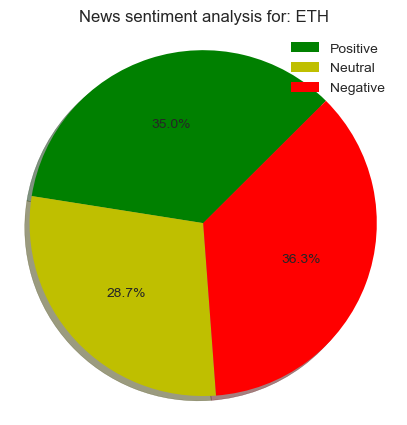

In [15]:
# Pie chart for sentiment analysis
sentiment_pie(ticker_df)

#### General Crypto News Sentiment

In [16]:
# extract general crypto news into df
df_news_sentiment = pd.read_json('https://cryptonews-api.com/api/v1/stat?&section=general&date=last30days&token=o0nxeaivbtzf74mhcwlcw9pxjr8zwzq4yxnkknlk')
df_news_sentiment

,total,data,total_pages
Total Positive,1025.000,NaN,1
Total Negative,889.000,NaN,1
Total Neutral,1186.000,NaN,1
Sentiment Score,0.066,NaN,1
2022-06-12,NaN,"{'Neutral': 2, 'Positive': 1, 'Negative': 7, '...",1
2022-06-11,NaN,"{'Neutral': 27, 'Positive': 26, 'Negative': 11...",1
2022-06-10,NaN,"{'Neutral': 48, 'Positive': 59, 'Negative': 29...",1
2022-06-09,NaN,"{'Neutral': 60, 'Positive': 57, 'Negative': 34...",1
2022-06-08,NaN,"{'Neutral': 83, 'Positive': 55, 'Negative': 37...",1
2022-06-07,NaN,"{'Neutral': 66, 'Positive': 78, 'Negative': 64...",1


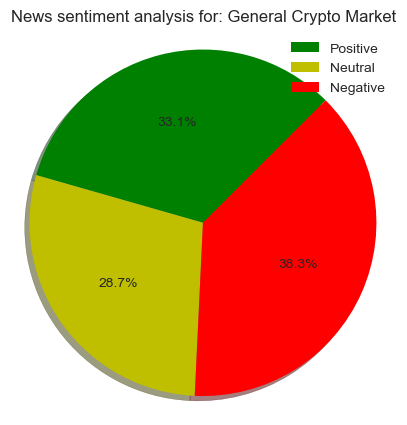

In [17]:
# summaries in pie chart using total scores
sentiment_pie(df_news_sentiment.iloc[:3, :1].rename(columns = {'total': 'General Crypto Market'}))

#### Events data
> Crypto news data describes the events data as "Our events endpoint showcases headlines that are receiving high news coverage". I will take these events as opposed to just the most recent news data since these events should be most influenctial on the market and crucial for investors

In [18]:
# inspect grab event data
pd.read_json('https://cryptonews-api.com/api/v1/events?&tickers={}&token=o0nxeaivbtzf74mhcwlcw9pxjr8zwzq4yxnkknlk'.format(ticker))

,data
0,{'event_name': 'Ethereum Core Developers annou...
1,{'event_name': 'Ethereum price falls almost 12...
2,{'event_name': 'Ethereum drops to lowest level...
3,{'event_name': 'Farfetch to begin accepting BT...
4,{'event_name': 'ApeCoin Community narrowly win...
5,{'event_name': 'Ethereum Successfully Executes...
6,{'event_name': 'Ethereum Merge test taking pla...
7,{'event_name': 'ApeCoin whales vote against pr...
8,{'event_name': 'Ethereum Shorts Liquidations s...
9,{'event_name': 'ApeCoin community overwhelming...


In [19]:
# transform into df for readability
df_events = pd.read_json('https://cryptonews-api.com/api/v1/events?&tickers={}&token=o0nxeaivbtzf74mhcwlcw9pxjr8zwzq4yxnkknlk'.format(ticker))['data'].apply(pd.Series)
df_events

,event_name,event_id,news_items,date,tickers
0,Ethereum Core Developers announce further dela...,FF95,4,"Sat, 11 Jun 2022 20:09:00 -0400",[ETH]
1,Ethereum price falls almost 12% in last 24 hours,FF91,7,"Sat, 11 Jun 2022 12:41:00 -0400",[ETH]
2,Ethereum drops to lowest level since March 2021,FF90,7,"Fri, 10 Jun 2022 16:35:00 -0400",[ETH]
3,"Farfetch to begin accepting BTC, ETH, BNB paym...",FF88,7,"Fri, 10 Jun 2022 15:46:00 -0400","[BTC, ETH, BNB]"
4,ApeCoin Community narrowly wins Vote to stay o...,FF72,11,"Thu, 09 Jun 2022 12:11:00 -0400","[APE, ETH]"
5,Ethereum Successfully Executes Merge on Ropste...,FF69,18,"Thu, 09 Jun 2022 07:50:00 -0400",[ETH]
6,Ethereum Merge test taking place today,FF57,20,"Wed, 08 Jun 2022 10:13:00 -0400",[ETH]
7,ApeCoin whales vote against proposal to stay o...,FF30,4,"Mon, 06 Jun 2022 12:35:00 -0400","[APE, ETH]"
8,Ethereum Shorts Liquidations spotted as price ...,FF29,6,"Mon, 06 Jun 2022 10:09:00 -0400",[ETH]
9,ApeCoin community overwhelmingly votes to stay...,FF14,4,"Fri, 03 Jun 2022 16:27:00 -0400","[APE, ETH]"


In [20]:
# transform tickers column to list since they are currently in brackets
df_events['tickers'] = [listToString(i) for i in df_events['tickers']]
df_events['tickers'].sample(5)

1     ETH
0     ETH
19    ETH
30    ETH
5     ETH
Name: tickers, dtype: object

In [21]:
# inspect first 5 events
for i in df_events['event_name'][df_events['tickers'] == ticker].head(5).values:
        print (i)

Ethereum Core Developers announce further delay of ‘Difficulty Bomb'
Ethereum price falls almost 12% in last 24 hours
Ethereum drops to lowest level since March 2021
Ethereum Successfully Executes Merge on Ropsten Testnet
Ethereum Merge test taking place today


***

## Twitter Sentiment Analysis

> I found some useful code created by others that I will include the sources for below:

> RodolfoFerro - https://github.com/RodolfoFerro/pandas_twitter/blob/master/01-extracting-data.md

> Yalin Yener - https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

#### Accessing Api (completed in functions/apis cell)

In [22]:
# Twitter API
# consumer_key = "1Fg4PBJuOXJVenQk9Pdnuyb3W"
# consumer_secret = "59WD8zKElMdLSO12xRVkmI0ADdacek9sNPPXZmfs2HvuxgS8mo"
# token = '901239757-VoFq2C7euGCoJCIOoUQ2BNid9DsRC6mdWTZMespg'
# tokensecret = 'RYhxQvTHm0PlYlqEzZThdKBd3b42Vp0GI8NWlCuqeECQM'
# callback_uri = 'oob'
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_uri)
# auth.set_access_token(token, tokensecret)
# redirect_url = auth.get_authorization_url()
# print(redirect_url)
# webbrowser.open(redirect_url)
# user_pin_input = input("What's the pin value? ")
# api = tweepy.API(auth)

#### Extracting tweets

In [23]:
# gather public tweets and inspect first data
tweet_search = api.search('bitcoin', count=200, lang='en', tweet_mode='extended')
tweet_search[0]

Status(_api=<tweepy.api.API object at 0x0000021E63CF47F0>, _json={'created_at': 'Sun Jun 12 13:21:44 +0000 2022', 'id': 1535975641346355200, 'id_str': '1535975641346355200', 'full_text': 'RT @DuologyID: Trust the peen to hodl you tight in this swinging period. \nAAA-AAAAA-AAAAA\n\nTARSPAM\n@spamgelo Genesis card no 48\n\nDispensing…', 'truncated': False, 'display_text_range': [0, 140], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'DuologyID', 'name': 'Duology', 'id': 1439634916761735168, 'id_str': '1439634916761735168', 'indices': [3, 13]}, {'screen_name': 'spamgelo', 'name': 'spam', 'id': 760026271208263680, 'id_str': '760026271208263680', 'indices': [99, 108]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str

In [24]:
# put into dataframe for more readability
# source: RodolfoFerro
tweets_df = pd.DataFrame(data=[i.full_text for i in tweet_search], columns=['tweet'])
tweets_df.head(10)

,tweet
0,RT @DuologyID: Trust the peen to hodl you tigh...
1,RT @saylor: Those using the words #crypto and ...
2,RT @gabh08: $LUNC - The Bear market Gold! \n\n...
3,ay Amid a Broader Retreat by the Cryptocurrenc...
4,RT @rovercrc: #Bitcoin will never hit $20k aga...
5,RT @BitcoinFear: Bitcoin Fear and Greed Index ...
6,RT @CriptovalutaI: 💥💥💥 #ItalianNationalDay 🇮🇹 ...
7,RT @shivu11875426: Every one remember or mark ...
8,@inmortalcrypto You won't hear that from me. W...
9,"RT @CryptoBusy: Remember, if #Bitcoin doesn’t ..."


In [25]:
# inspect some additional info about the tweets
# source: RodolfoFerro
tweets_df['len'] = np.array([len(i.full_text) for i in tweet_search])
tweets_df['Date'] = np.array([i.created_at for i in tweet_search])
tweets_df['Source'] = np.array([i.source for i in tweet_search])
tweets_df['Likes'] = np.array([i.favorite_count for i in tweet_search])
tweets_df['RTs']  = np.array([i.retweet_count for i in tweet_search])
tweets_df.head(10)

,tweet,len,Date,Source,Likes,RTs
0,RT @DuologyID: Trust the peen to hodl you tigh...,140,2022-06-12 13:21:44,Twitter for iPhone,0,3
1,RT @saylor: Those using the words #crypto and ...,90,2022-06-12 13:21:43,Twitter for iPad,0,400
2,RT @gabh08: $LUNC - The Bear market Gold! \n\n...,95,2022-06-12 13:21:42,Twitter for Android,0,2
3,ay Amid a Broader Retreat by the Cryptocurrenc...,223,2022-06-12 13:21:42,Twitter Web App,0,0
4,RT @rovercrc: #Bitcoin will never hit $20k aga...,57,2022-06-12 13:21:41,Twitter Web App,0,205
5,RT @BitcoinFear: Bitcoin Fear and Greed Index ...,113,2022-06-12 13:21:41,Twitter for Android,0,48
6,RT @CriptovalutaI: 💥💥💥 #ItalianNationalDay 🇮🇹 ...,140,2022-06-12 13:21:39,Twitter for Android,0,804
7,RT @shivu11875426: Every one remember or mark ...,105,2022-06-12 13:21:38,Twitter for iPhone,0,182
8,@inmortalcrypto You won't hear that from me. W...,108,2022-06-12 13:21:37,Twitter for Android,0,0
9,"RT @CryptoBusy: Remember, if #Bitcoin doesn’t ...",140,2022-06-12 13:21:36,Twitter Web App,0,1247


#### Extracting Sentiment

In [26]:
# Calculating Negative, Positive, Neutral and Compound values
# Source: Yalin Yener
tweets_df[['polarity', 'subjectivity']] = tweets_df['tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweets_df['tweet'].iteritems():
    Score = SentimentIntensityAnalyzer().polarity_scores(row)
    Negative = Score['neg']
    Neutral = Score['neu']
    Positive = Score['pos']
    Compound = Score['compound']
    if Negative > Positive:
        tweets_df.loc[index, 'sentiment'] = "negative"
    elif Positive > Negative:
        tweets_df.loc[index, 'sentiment'] = "positive"
    else:
        tweets_df.loc[index, 'sentiment'] = "neutral"
        tweets_df.loc[index, 'neg'] = Negative
        tweets_df.loc[index, 'neu'] = Neutral
        tweets_df.loc[index, 'pos'] = Positive
        tweets_df.loc[index, 'compound'] = Compound
tweets_df.sample(10)

,tweet,len,Date,Source,Likes,RTs,polarity,subjectivity,sentiment,neg,neu,pos,compound
46,"RT @CryptoBusy: Remember, if #Bitcoin doesn’t ...",140,2022-06-12 13:21:09,Twitter for Android,0,1247,0.208333,0.416667,positive,NaN,NaN,NaN,NaN
23,Latest: Gemini Exchange to Stop Providing Free...,195,2022-06-12 13:21:27,IFTTT,0,0,0.466667,0.866667,positive,NaN,NaN,NaN,NaN
68,@unreal_jesse @conspiracyb0t @federalreserve @...,121,2022-06-12 13:20:59,Twitter for iPhone,0,0,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
64,RT @pugg_io: We are starting a campaign on @Pr...,140,2022-06-12 13:21:00,Twitter for iPhone,0,3018,0.033333,0.285714,neutral,0.0,1.0,0.0,0.0
19,6 Questions for Alex Wilson of The Giving Bloc...,130,2022-06-12 13:21:29,cryptopublish,0,0,0.000000,0.000000,negative,NaN,NaN,NaN,NaN
28,RT @caanuragwriter: Compilation of my handwrit...,140,2022-06-12 13:21:21,Twitter for Android,0,54,0.000000,0.333333,negative,NaN,NaN,NaN,NaN
67,RT @AltsomeOfficial: #Dogecoin could soon be a...,140,2022-06-12 13:20:59,Twitter Web App,0,2,0.187500,0.487500,positive,NaN,NaN,NaN,NaN
2,RT @gabh08: $LUNC - The Bear market Gold! \n\n...,95,2022-06-12 13:21:42,Twitter for Android,0,2,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
18,"@BTC_Archive Yeah no shit, baldy.",33,2022-06-12 13:21:30,Twitter for iPhone,0,0,0.100000,0.800000,negative,NaN,NaN,NaN,NaN
73,RT @dellamyla: #Bitcoin education is the most...,85,2022-06-12 13:20:56,Twitter for Android,0,28,0.392857,0.517857,positive,NaN,NaN,NaN,NaN


In [27]:
#creating new data frames for all sentiments (positive, negative and neutral)
# source: Yalin Yener
total=tweets_df.loc[:,"sentiment"].value_counts(dropna=False)
percentage=round(tweets_df.loc[:,"sentiment"].value_counts(dropna=False,normalize=True)*100,2)
pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

,Total,Percentage
positive,37,49.33
neutral,26,34.67
negative,12,16.00


#### Cashtag or Hashtag

> Tweets involving tickers usually use cashtags instead of hashtags. I'll inspect the difference below

In [28]:
query = '$BTC'
query_res = []
for i, status in enumerate(tweepy.Cursor(api.search, q=query).items(10)):
    query_res.append(i)
    print(i, status.text, status.author.screen_name)

0 RT @LapoTrading: $BTC if it is “spring” there we are. giulianog1978
1 RT @CriptovalutaI: 💥💥💥 #ItalianNationalDay 🇮🇹 #Bitcoin  💥💥💥

Festeggiamo il #2giugno con un #Giveaway #BTC

🎁Gift: 0.015 $BTC for the winne… sundagaran
2 💸Are you ready for the new trend?!

#EARNZ

🏀#MoveZ community, we know you love earning. Make sure you grab one of… https://t.co/QnkUOvNmmM BlueZillaVc
3 As $BTC and $ETH continue to ruin the good time in alts this is a great opportunity to revisit why you’re holding w… https://t.co/cAgike2EYc 0xMoist
4 Latest: Gemini Exchange to Stop Providing Free Crypto withdrawals from June 15
https://t.co/xeXOHxo1TW #bitcoin… https://t.co/tRBkDf29FQ coincodecap
5 RT @rektcapital: #BTC is down -40% since the Death Cross occurred in early Jan '22

History suggests that whenever a Death Cross occurs, #B… CryptoIdiot8
6 RT @kanerinx: 1/ Web3黎明期のNFT業界では、「退場しないこと」が大事だよねという話。クリエイターを引きずり降ろす未来が来るかもね、という話を散文ツイート。

いまの時代は、Web3黎明期。
あと数年で終わるボーナスタイムともいえます。
$BTC $ETH… satochan_nft
7 RT @rek

In [29]:
query = '#BTC'
query_res = []
for i, status in enumerate(tweepy.Cursor(api.search, q=query).items(10)):
    query_res.append(i)
    print(i, status.text, status.author.screen_name)

0 RT @GrafikPolisi07: #BTC #BTCUSD #BTCUSDT #Bitcoin 21 mayısta yaptğımız haftalık rsi tahmini muhteşem şekilde devam ediyor.. Zaman geçtikçe… efelerinefesi91
1 RT @endangered_art: 🥳🥳It’s that time wonderful beings🎉🎉
 
Title: 250 $ZIL #Giveaway 

Rules‼️GoodLuck🍀

1️⃣Follow @endangered_art and @zill… MarcosO65433096
2 RT @John_jay311: Are you looking for a project with utilities and purpose? The look no more.  @Marvin_Inu is packed with all the utilities… Herritage01
3 📢12 June My Technical Analysis

📋 Curated post from Publish0x
💎 Read or write articles and get 💰 #crypto #referral… https://t.co/F9eXtxy1AC bruindesimon
4 The number of Terra LUNC users increased by more than 500% in a month.

According to data from CoinMarketCap, the t… https://t.co/7XL6hZubYn lissacrypto
5 ビットコインも、イーサリアムも仮想通貨市場は総崩れ。昨晩より市場時価総額は更に7兆減。このペースで行くと、週明けに何と市場時価総額が130兆を割る可能性！ビットコイン ＃BTC のドミナンス47.4％のイーサリアム ＃ETH が1… https://t.co/DmKLbsVCZ3 bb_garyukun_555
6 RT @muhaf_z34: you may not have money today tomorrow will

> Tweets with cashtags are generally less focused on giveaways, etc. and will give more accurate results for sentiment analysis.

***

## Binance Price Chart

In [30]:
# Binance API
# b_apikey = 'W5q81Vwva3j7dIqdSVkYGiQjH7nIcmukDGzTM4uSpwCWVmJNYKKuAceXWWCC7uYq'
# b_secret = 'k5ilCtVaEk9zge1k9opuehooGHd07dNwS8wsmci1AenWrXMPUd62M0irTHO8paPS'
# client = Client(b_apikey, b_secret)
#get historical data (ticker, time interval, time range (now - 1 day)
historical = client.get_historical_klines('{}USDT'.format(ticker), Client.KLINE_INTERVAL_1HOUR, "1 day ago UTC")
historical[0:5]

[[1654956000000,
  '1572.42000000',
  '1572.42000000',
  '1517.00000000',
  '1526.62000000',
  '111623.52801000',
  1654959599999,
  '172842170.06771700',
  81102,
  '43936.95530000',
  '68063592.80602390',
  '0'],
 [1654959600000,
  '1526.62000000',
  '1534.30000000',
  '1501.00000000',
  '1517.60000000',
  '129414.38614000',
  1654963199999,
  '196006804.13352240',
  108898,
  '62007.60629000',
  '93918775.39868500',
  '0'],
 [1654963200000,
  '1517.61000000',
  '1546.96000000',
  '1496.74000000',
  '1535.75000000',
  '119150.88951000',
  1654966799999,
  '181260490.90998430',
  89181,
  '59200.41425000',
  '90210933.34879300',
  '0'],
 [1654966800000,
  '1535.75000000',
  '1544.59000000',
  '1528.27000000',
  '1533.95000000',
  '43289.05830000',
  1654970399999,
  '66542705.57392400',
  39165,
  '20457.58220000',
  '31444315.73297800',
  '0'],
 [1654970400000,
  '1533.95000000',
  '1578.00000000',
  '1530.58000000',
  '1551.18000000',
  '57682.31030000',
  1654973999999,
  '89339457

In [31]:
#get historical data (ticker, time interval, time range (now - 1 day)
historical = client.get_historical_klines('{}USDT'.format(ticker), Client.KLINE_INTERVAL_1HOUR, "1 day ago UTC")
historical[0:5]

[[1654956000000,
  '1572.42000000',
  '1572.42000000',
  '1517.00000000',
  '1526.62000000',
  '111623.52801000',
  1654959599999,
  '172842170.06771700',
  81102,
  '43936.95530000',
  '68063592.80602390',
  '0'],
 [1654959600000,
  '1526.62000000',
  '1534.30000000',
  '1501.00000000',
  '1517.60000000',
  '129414.38614000',
  1654963199999,
  '196006804.13352240',
  108898,
  '62007.60629000',
  '93918775.39868500',
  '0'],
 [1654963200000,
  '1517.61000000',
  '1546.96000000',
  '1496.74000000',
  '1535.75000000',
  '119150.88951000',
  1654966799999,
  '181260490.90998430',
  89181,
  '59200.41425000',
  '90210933.34879300',
  '0'],
 [1654966800000,
  '1535.75000000',
  '1544.59000000',
  '1528.27000000',
  '1533.95000000',
  '43289.05830000',
  1654970399999,
  '66542705.57392400',
  39165,
  '20457.58220000',
  '31444315.73297800',
  '0'],
 [1654970400000,
  '1533.95000000',
  '1578.00000000',
  '1530.58000000',
  '1551.18000000',
  '57682.31030000',
  1654973999999,
  '89339457

In [32]:
#create list of columns for historical data df
columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

#put historical data into df
hist_df = pd.DataFrame(historical)

#specify column names
hist_df.columns = columns
hist_df.head() 

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1654956000000,1572.42000000,1572.42000000,1517.00000000,1526.62000000,111623.52801000,1654959599999,172842170.06771700,81102,43936.95530000,68063592.80602390,0
1,1654959600000,1526.62000000,1534.30000000,1501.00000000,1517.60000000,129414.38614000,1654963199999,196006804.13352240,108898,62007.60629000,93918775.39868500,0
2,1654963200000,1517.61000000,1546.96000000,1496.74000000,1535.75000000,119150.88951000,1654966799999,181260490.90998430,89181,59200.41425000,90210933.34879300,0
3,1654966800000,1535.75000000,1544.59000000,1528.27000000,1533.95000000,43289.05830000,1654970399999,66542705.57392400,39165,20457.58220000,31444315.73297800,0
4,1654970400000,1533.95000000,1578.00000000,1530.58000000,1551.18000000,57682.31030000,1654973999999,89339457.43319900,47725,30304.43070000,46935452.96149900,0


In [33]:
#create list of numeric column names for historical 
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

#convert open/close time to datetime (/1000 because of extra zeros in data, unit =seconds)
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')

#convert numeric columns to numeric data
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open Time           24 non-null     datetime64[ns]
 1   Open                24 non-null     float64       
 2   High                24 non-null     float64       
 3   Low                 24 non-null     float64       
 4   Close               24 non-null     float64       
 5   Volume              24 non-null     float64       
 6   Close Time          24 non-null     datetime64[ns]
 7   Quote Asset Volume  24 non-null     float64       
 8   Number of Trades    24 non-null     int64         
 9   TB Base Volume      24 non-null     float64       
 10  TB Quote Volume     24 non-null     float64       
 11  Ignore              24 non-null     object        
dtypes: datetime64[ns](2), float64(8), int64(1), object(1)
memory usage: 2.4+ KB


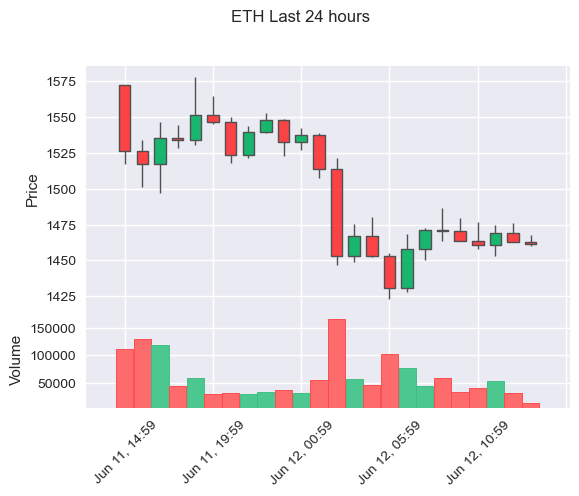

In [34]:
# plot data
# hourly last 24 hours
mpf.plot(hist_df.set_index('Close Time').tail(24), 
        **kwargs, style=s,
        title=ticker.replace('USDT', '') + ' Last 24 hours') # Binance provides price against USDT, which is tied to the value of a US dollar.